# Linear Neural Networks 

### Linear Reg in PyTorch

Focus on constructing computational graph, and PyTorch will automatically compute the gradient for you.

1. Prepare Dataset
2. Design Model using Class (inherit from `nn.Module`)
3. Cpnstruct Loss and Optimizer 
4. Training Cycle (forward, backward, update)

##### 1. Prepare Dataset

In [ ]:
import torch

# Create 3*1 tensors for matrix multiplication, so use [1.0] instead of 1.0
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])

Key: 
1. get the dimension of input and output, and construct weight and bias that match the dimension
2. loss must be a scalar, so we need to sum the loss of all samples

##### 2. Design Model

In [ ]:
# Inherit from torch.nn.Module
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        # Class nn.Linear cotains 2 member Tensor: weight, bias
        # nn.Linear(in_features, out_features, bias=True)
        # in_features: size of each input sample, out_features: size of each output sample
        # Input: (N, *, in_features), Output: (N, *, out_features)
        self.linear = torch.nn.Linear(1,1)

    # forward() have to be implemented
    # backward will be automatically defined
    def forward(self, x):
        # Class nn.Linear has implemented method __call__(), which enables the instance to be called as a function
        # Normally forward() is called by __call__()
        y_pred = self.linear(x)
        return y_pred
 
model = LinearModel()

##### 3. Construct Loss and Optimizer

In [ ]:
# MSEloss inherits from torch.nn.Module, also construct a computational graph
critertion = torch.nn.MSELoss(reduction='sum')

# model.parameters() get all the parameters of the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

##### 4. Training Cycle

In [ ]:
for epoch in range(1000):
    # forward: predict
    y_pred = model(x_data)
    # forward: compute loss
    loss = critertion(y_pred, y_data)
    print(epoch, loss.item())

    # before backward, remember to clear the grad
    optimizer.zero_grad()
    # backward: compute grad
    loss.backward()
    # update parameters
    optimizer.step()

# weight is [[]], to get the value, use item()
print('w=', model.linear.weight.item())
print('b=', model.linear.bias.item())

# Test
x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred=', y_test.data)


0 149.1002960205078
1 147.79229736328125
2 146.4902801513672
3 145.19430541992188
4 143.90451049804688
5 142.62094116210938
6 141.34371948242188
7 140.0729217529297
8 138.80865478515625
9 137.55099487304688
10 136.300048828125
11 135.05584716796875
12 133.8185272216797
13 132.58811950683594
14 131.36471557617188
15 130.1483612060547
16 128.93914794921875
17 127.73712158203125
18 126.54232788085938
19 125.3548355102539
20 124.17469787597656
21 123.00194549560547
22 121.83660888671875
23 120.67877197265625
24 119.5284194946289
25 118.38558197021484
26 117.25032043457031
27 116.12265014648438
28 115.00259399414062
29 113.89014434814453
30 112.78532409667969
31 111.68817138671875
32 110.59867095947266
33 109.51683807373047
34 108.44267272949219
35 107.37617492675781
36 106.31735229492188
37 105.26617431640625
38 104.22267150878906
39 103.18681335449219
40 102.15859985351562
41 101.13801574707031
42 100.12504577636719
43 99.11967468261719
44 98.12189483642578
45 97.13168334960938
46 96.1490

### Logistic Regression

There are many sigmoid functions, but the most common one is the logistic function:
$$ \sigma(\hat{y}) = \frac{1}{1 + e^{-\hat{y}}}$$

Loss function: BCE
$$ L(y, \hat{y}) = - (y\log(\hat{y}) + (1-y)\log(1-\hat{y}))$$
For batch samples:
$$ L(y, \hat{y}) = - \frac{1}{N} \sum_{n=1}^{N} (y_n\log(\hat{y}_n) + (1-y_n)\log(1-\hat{y}_n))$$

#### 1. Prepare Dataset

In [ ]:
import torch

x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0], [0], [1]])

#### 2. Design model

In [ ]:
import torch
import torch.nn as nn

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        # nn.Linear(in_features, out_features, bias=True)
        # Input: (N, *, in_features), Output: (N, *, out_features)
        self.linear = torch.nn.Linear(1,1)
        # Using Sequential class to build the model
        self.layer = nn.Sequential(
            nn.Linear(1, 1),
            nn.Sigmoid()
        )


    def forward(self, x):
        y_pred = self.layer(x)
        return y_pred
 
model = LogisticRegressionModel() 

#### 3. Construct loss and optimizer

In [ ]:
# Taking average or not impacts gradient size -> impacts learning rate
critertion = torch.nn.BCELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=0.02)

#### 4. Training cycle

In [ ]:
# No change in training process
for epoch in range(1000):
    y_pred = model(x_data)
    # y_pred is probability, so y_data should be float
    loss = critertion(y_pred, y_data.float())
    print(f'[epoch]:{epoch} loss = {loss.item()}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[epoch]:0 loss = 0.8379241824150085
[epoch]:1 loss = 0.8324453234672546
[epoch]:2 loss = 0.8271958827972412
[epoch]:3 loss = 0.822167694568634
[epoch]:4 loss = 0.8173523545265198
[epoch]:5 loss = 0.812741756439209
[epoch]:6 loss = 0.808327853679657
[epoch]:7 loss = 0.8041028380393982
[epoch]:8 loss = 0.8000590205192566
[epoch]:9 loss = 0.7961887717247009
[epoch]:10 loss = 0.7924845814704895
[epoch]:11 loss = 0.7889396548271179
[epoch]:12 loss = 0.7855467796325684
[epoch]:13 loss = 0.782299280166626
[epoch]:14 loss = 0.779190719127655
[epoch]:15 loss = 0.776214599609375
[epoch]:16 loss = 0.7733650207519531
[epoch]:17 loss = 0.7706359028816223
[epoch]:18 loss = 0.7680216431617737
[epoch]:19 loss = 0.7655169367790222
[epoch]:20 loss = 0.763116180896759
[epoch]:21 loss = 0.760814905166626
[epoch]:22 loss = 0.7586076855659485
[epoch]:23 loss = 0.7564902305603027
[epoch]:24 loss = 0.7544580101966858
[epoch]:25 loss = 0.7525067925453186
[epoch]:26 loss = 0.7506327033042908
[epoch]:27 loss = 0

##### Result Visualization

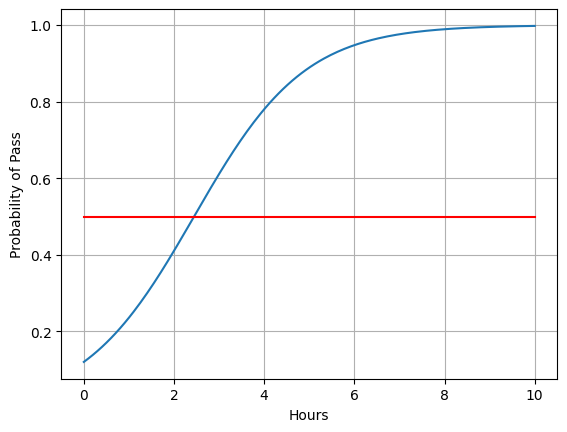

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()

plt.plot(x,y)
plt.plot([0,10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Pass')
plt.grid()
plt.show()

### Multiple Dimension Input

In pytorch, Sigmoid function is in an element-wise 
$$\left[\begin{array}{c}\hat{y}^{(1)} \\ \vdots \\ \hat{y}^{(N)}\end{array}\right]=\left[\begin{array}{c}\sigma\left(z^{(1)}\right) \\ \vdots \\ \sigma\left(z^{(N)}\right)\end{array}\right]=\sigma\left(\left[\begin{array}{c}z^{(1)} \\ \vdots \\ z^{(N)}\end{array}\right]\right)$$

#### 1. Prepare Dataset

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Why float32: Cheap GPU like 2080 only support float32
xy = np.loadtxt('./diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:,:-1])
# [-1] to ensure the shape is (n,1) (matrix) instead of (n,) (array)
y_data = torch.from_numpy(xy[:,[-1]])

#### 2. Design Model
Let's implement the model with multiple layer and multiple dimension input.

<div style="text-align: center">
    <img src="./Asset/p1.png" width="150" height="250">
</div>

In [ ]:
# Implement input like above (8 input features)

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # nn.Linear(in_features, out_features, bias=True)
        # Input: (N, *, in_features), Output: (N, *, out_features)
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        self.activate = torch.nn.ReLU()

    def forward(self, x):
        # Using x as all names avoding confusion
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        # Last layer: using sigmoid to get probability of 0-1
        x = self.sigmoid(self.linear3(x))
        return x
 
model = Model()

#### 3. Construct Loss and Optimizer

In [ ]:
critertion = torch.nn.BCELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

#### 4. Training Cycle

Text(0.5, 0, 'Epoch')

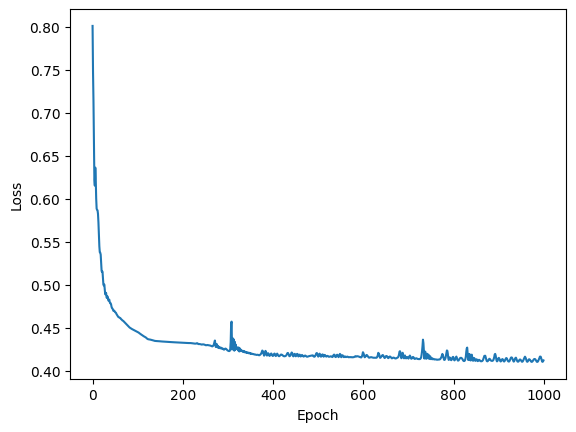

In [ ]:
loss_list = []
for epoch in range(1000):
    # Forward
    # Use all of the data, not use Mini-batch
    y_pred = model(x_data)
    loss = critertion(y_pred, y_data.float())
    loss_list.append(loss.item())


    # Backward
    optimizer.zero_grad()
    loss.backward()

    # Update
    optimizer.step()

plt.plot(np.arange(1000), loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Dataset and DataLoader

##### 1. Prepare Dataset

**Dataset**: `__getitem__` and `__len__` method for DataLoader to use

**DataLoarder**: iterate the dataset batch by batch. It's a iterable object, using `for` loop to get data

In [ ]:
import torch
# Dataset is an abstrct class, so need to inherit
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Inherit from abstract class Dataset
class DiabetesDataset(Dataset):
    def __init__(self, filepath):
        xy = np.loadtxt(filepath, delimiter=',', dtype=np.float32)
        # To get __len__ funtion
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:,[-1]])
        

    def __getitem__(self, index):
    # the expression, dataset[index] will call this magic function
        return self.x_data[index], self.y_data[index]

    def __len__(self):
    # the expression, len(dataset) will call this magic function
        return self.len

dataset = DiabetesDataset('./data/diabetes.csv.gz')
# Initialize loader with batch-size, shuffle, process number
train_loader = DataLoader(dataset=dataset, 
                          batch_size=32, 
                          shuffle=True, 
                          num_workers=0)

#### 2. Design Model

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # nn.Linear(in_features, out_features, bias=True)
        # Input: (N, *, in_features), Output: (N, *, out_features)
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        self.activate = torch.nn.ReLU()

    def forward(self, x):
        # Using x as all names avoding confusion
        x = self.activate(self.linear1(x))
        x = self.activate(self.linear2(x))
        # Last layer: using sigmoid to get probability of 0-1
        x = self.sigmoid(self.linear3(x))
        return x
 
model = Model()

#### 3. Construct Loss and Optimizer

In [ ]:
critertion = torch.nn.BCELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

#### 4. Training Cycle (w. Mini-batch)
```python
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
```

**Epoch** : One forward pass and one backward pass of
all the training examples.

**Batch Size** : The number of training examples in one forward/backward pass.

**Number of Iterations** : Number of passes, each pass using [batch size] number of examples.

In [ ]:
for epoch in range(100):
    # enumerate() return iteration number and data(tuple(x,y))
    # count from 0 everytime
    for i, data in enumerate(train_loader, 0):
        # 1. Prepare data, dataloader turn batch data into tensor (input, label)
        inputs, labels = data
        # 2. Forward
        y_pred = model(inputs)
        loss = critertion(y_pred, labels.float())
        print(epoch, i, loss.item())
        # 3. Backward
        optimizer.zero_grad()
        loss.backward()
        # 4. Update
        optimizer.step()

0 0 0.7179622650146484
0 1 0.6940944790840149
0 2 0.7019489407539368
0 3 0.6828098297119141
0 4 0.683644711971283
0 5 0.6629443764686584
0 6 0.6713489890098572
0 7 0.6598894596099854
0 8 0.6797775030136108
0 9 0.647676944732666
0 10 0.6403381824493408
0 11 0.6845622658729553
0 12 0.6669638752937317
0 13 0.6625685691833496
0 14 0.6063908338546753
0 15 0.5953986644744873
0 16 0.6187304854393005
0 17 0.6301994919776917
0 18 0.6332854628562927
0 19 0.6141797304153442
0 20 0.6114185452461243
0 21 0.5908150672912598
0 22 0.6541110277175903
0 23 0.6417009234428406
1 0 0.5994130969047546
1 1 0.5328851938247681
1 2 0.5920973420143127
1 3 0.5967020988464355
1 4 0.6366696357727051
1 5 0.5132558345794678
1 6 0.549263596534729
1 7 0.5526039004325867
1 8 0.5652108788490295
1 9 0.48442065715789795
1 10 0.5138839483261108
1 11 0.6227272152900696
1 12 0.5543962121009827
1 13 0.5961958169937134
1 14 0.6755763292312622
1 15 0.47280383110046387
1 16 0.5160782933235168
1 17 0.5432878136634827
1 18 0.615496

42 18 0.40367797017097473
42 19 0.4442695379257202
42 20 0.5227696299552917
42 21 0.4436158537864685
42 22 0.340401291847229
42 23 0.3820386826992035
43 0 0.43127793073654175
43 1 0.5508573055267334
43 2 0.36450910568237305
43 3 0.53404700756073
43 4 0.3814025819301605
43 5 0.3696171045303345
43 6 0.46383601427078247
43 7 0.4398954212665558
43 8 0.34573468565940857
43 9 0.4652055501937866
43 10 0.42644640803337097
43 11 0.38723552227020264
43 12 0.36742278933525085
43 13 0.4529993534088135
43 14 0.4643312692642212
43 15 0.4719873070716858
43 16 0.4999968707561493
43 17 0.39718014001846313
43 18 0.3692626655101776
43 19 0.5019128322601318
43 20 0.5000259280204773
43 21 0.5376843214035034
43 22 0.3533092141151428
43 23 0.3274208903312683
44 0 0.5363604426383972
44 1 0.506305456161499
44 2 0.4746845066547394
44 3 0.3645395040512085
44 4 0.36660894751548767
44 5 0.4033438563346863
44 6 0.345934122800827
44 7 0.4204801619052887
44 8 0.41036707162857056
44 9 0.44468486309051514
44 10 0.43009

### Softmax Classifier

Softmax function: suppose $Z^l \in \mathbb{R}^{K}$
$$ P(y = j) = \frac{e^{Z^l_j}}{\sum_{k=0}^{K} e^{Z^l_k}}$$

NLL loss:
$$ L(y, \hat{y}) = - \sum_{j=0}^{K} y_j \log(\hat{y}_j)$$

In [ ]:
# Cross Entropy in Numpy
import numpy as np
y = np.array([1, 0, 0])
z = np.array([0.2, 0.1, -0.1])
y_pred = np.exp(z)/np.exp(z).sum()
loss = (-y*np.log(y_pred)).sum()
print(loss)

0.9729189131256584


In [ ]:
# Cross Entropy in Pytorch
import torch
# LongTensor show the index of the class
y = torch.LongTensor([0])
z = torch.Tensor([[0.2, 0.1, -0.1]])
# CrossEntropyLoss() = log_softmax() + NLLLoss()
criterion = torch.nn.CrossEntropyLoss()
loss = criterion(z, y)
print(loss)

tensor(0.9729)


#### 1. Prepare Dataset

In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
batch_size = 64

# transform.ToTensor() convert PIL image or numpy.ndarray to tensor
# transform.Compose() combine several transforms together, like pipeline
transform = transforms.Compose([
    # Transfer PIL image to tensor: c*h*w, value in [0,1]
    transforms.ToTensor(),
    # Normalize parameters are mean and std of MNIST dataset
    transforms.Normalize((0.1307,), (0.3081,))
])

# datasets.MNIST() includes getitem() and len()
train_dataset = datasets.MNIST(root='./mnist_data/',
                                 train=True,
                                 download=True,
                                 transform=transform)
train_loader = DataLoader(dataset=train_dataset,
                            batch_size=batch_size,
                            shuffle=True)

test_dataset = datasets.MNIST(root='./mnist_data/',
                                train=False,
                                download=True,
                                transform=transform)

test_loader = DataLoader(dataset=test_dataset,
                            batch_size=batch_size,
                            shuffle=False)

#### 2. Design Model

<div style="text-align: center">
    <img src="./Asset/p2.png" width="350" height="400">
</div>

Need to flatten the input to a vector: (1, 28, 28) $\to$ (1, 784)

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # nn.Linear(in_features, out_features, bias=True)
        self.l1 = torch.nn.Linear(784,512)
        self.l2 = torch.nn.Linear(512,256)
        self.l3 = torch.nn.Linear(256,128)
        self.l4 = torch.nn.Linear(128,64)
        self.l5 = torch.nn.Linear(64,10)
        self.activate = torch.nn.ReLU()

    def forward(self, x):
        # view() is reshape, -1 means infer from other dimensions
        x = x.view(-1, 28*28)
        x = self.activate(self.l1(x))
        x = self.activate(self.l2(x))
        x = self.activate(self.l3(x))
        x = self.activate(self.l4(x))
        # Last layer: put it into softmax in CrossEntropyLoss()
        return self.l5(x)
 
model = Model()

##### 3. Construct Loss and Optimizer

**CrossEntropyLoss() = log_softmax() + NLLLoss()**

In [ ]:
criterion =  torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

##### 4. Training and Testing

In [ ]:
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, traget = data
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, traget)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch+1, batch_idx+1, running_loss/300))
            running_loss = 0.0

In [ ]:
def test():
    correct = 0
    total = 0
    # no_grad() to avoid gradient calculation
    with torch.no_grad():
        for data in test_loader:
            inputs, traget = data
            outputs = model(inputs)
            # torch.max() return (max_value, index), dim=1 means max in each row
            _, predicted = torch.max(outputs.data, dim=1)
            total += traget.size(0)
            correct += (predicted == traget).sum().item()
    print('Accuracy on test set: %d %%' % (100*correct/total))

In [ ]:
if __name__ == '__main__':
    for epoch in range(10):
        train(epoch)
        if epoch % 5 == 4:
            test()

[1,   300] loss: 2.184
[1,   600] loss: 0.908
[1,   900] loss: 0.455
[2,   300] loss: 0.343
[2,   600] loss: 0.282
[2,   900] loss: 0.236
[3,   300] loss: 0.197
[3,   600] loss: 0.181
[3,   900] loss: 0.156
[4,   300] loss: 0.134
[4,   600] loss: 0.130
[4,   900] loss: 0.117
[5,   300] loss: 0.100
[5,   600] loss: 0.096
[5,   900] loss: 0.093
Accuracy on test set: 96 %
[6,   300] loss: 0.076
[6,   600] loss: 0.074
[6,   900] loss: 0.079
[7,   300] loss: 0.061
[7,   600] loss: 0.058
[7,   900] loss: 0.066
[8,   300] loss: 0.050
[8,   600] loss: 0.050
[8,   900] loss: 0.051
[9,   300] loss: 0.041
[9,   600] loss: 0.036
[9,   900] loss: 0.044
[10,   300] loss: 0.033
[10,   600] loss: 0.031
[10,   900] loss: 0.037
Accuracy on test set: 97 %
